# Principal Component Analysis (PCA) for Feature Reduction and Model Improvement

## Introduction

In this data analysis project, I will explore the application of Principal Component Analysis (PCA) to reduce the dimensionality of a dataset and enhance the performance of a machine learning model. The dataset used in this analysis pertains to telescope data. It was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

The primary goals of this project are as follows:

1. **Data Loading and Preprocessing**: We will initiate the project by loading the telescope dataset and ensuring data cleanliness by eliminating any null or NaN values.

2. **Exploratory Data Analysis (EDA)**: An initial phase of data exploration will involve displaying the first few rows of the dataset and generating a correlation matrix heatmap to visualize feature correlations.

3. **PCA using NumPy**: We will perform PCA using NumPy to gain insights into the dataset's variances and principal components. This will encompass the computation of eigenvalues, eigenvectors, and the visualization of explained variance ratios through scree plots.

4. **PCA using scikit-learn**: The scikit-learn PCA module will be leveraged to carry out PCA on the dataset. Steps will include data standardization, determination of principal components, and extraction of explained variances.

5. **Using PCA Features in a Machine Learning Model**: The dataset will be transformed into a reduced feature space incorporating two principal components (PC1 and PC2) utilizing scikit-learn's PCA functionality. The distribution of data points based on these components will be visualized, and class labels will be converted for machine learning.

6. **Model Comparison**: A Linear Support Vector Classifier (LinearSVC) will be trained using both the two PCA features and two original features selected from the dataset. The accuracy of the models will be compared to assess the impact of PCA on model performance.

7. **Summary of Results**: The results will be succinctly summarized, with a focus on highlighting the improvement in accuracy achieved by employing PCA features in comparison to original features.

This project aims to underscore the efficacy of PCA in dimensionality reduction and exemplify how it can bolster the accuracy of a machine learning model. By juxtaposing the performance of models with PCA features against those with original features, we will elucidate the information retained by PCA components.

Let's proceed with the code to delve into the details of these methods.

----

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

## Load Data

In [ ]:
# Read the csv data as a DataFrame
df = pd.read_csv('datasets/telescope_data.csv', index_col=0)

# Remove null and na values
df.dropna()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Explore Dataset

In [ ]:
# Inspect DataFrame
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
# Create predictor and target variables, X and y
classes = df['class']
data_matrix = df.drop(columns='class')

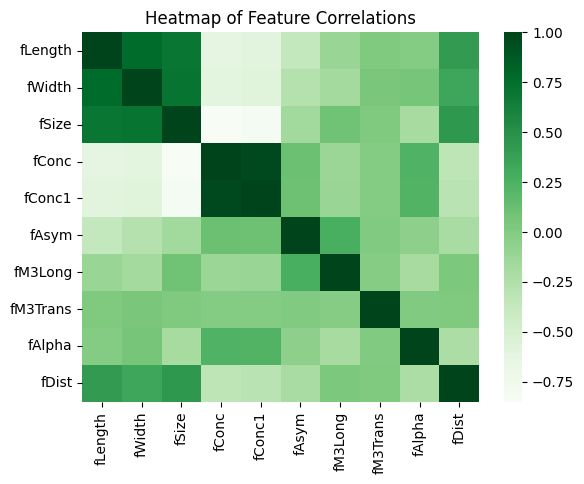

In [ ]:
# Create a correlation matrix
correlation_matrix = data_matrix.corr()

# Display the correlation matrix using seaborn's heatmap
ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Heatmap of Feature Correlations')
plt.show()

**Summary:** <br>
Given that the features are correlated, we will perform PCA to get a new set of features, and select the features that contain the most information. 

## PCA in NumPy

In [ ]:
# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)


Eigenvalues length: 10, Original Number of Features: 10
(10,) (10, 10)


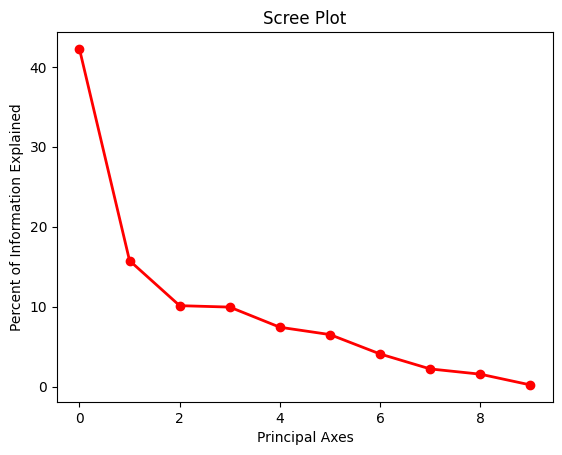

In [ ]:
# Find the variance/information percentages for each eigenvalue.
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

**Summary:** <br>
From this plot, we see that the first principal component explains about 42% of the variation in the data, the second explains about 15%, and so on.

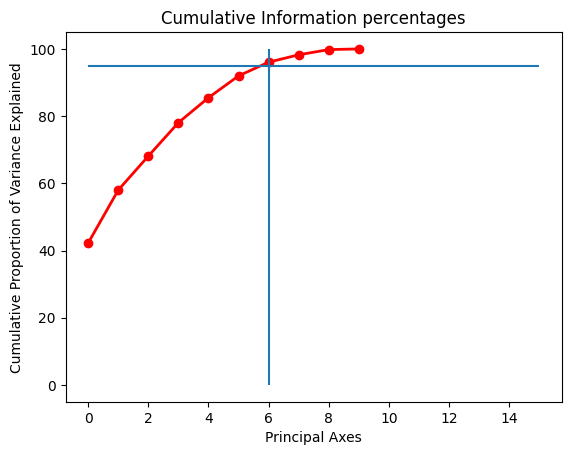

In [ ]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=6, ymin=0, ymax=100)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

**Summary:** <br>
From this plot, we see that six principal axes account for 95% of the variation in the data.

## PCA in sklearn

In [ ]:
## Load target classes
classes = pd.read_csv('./classes.csv', index_col=0)['class']

In [ ]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [ ]:
# Find the principal components
pca = PCA()

# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')

Number of features in the data matrix: 10
Number of features in the principal components: 10


In [ ]:
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

# Eigenvectors are in the property `.components_` as row vectors. To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_.T

# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

pd.DataFrame(principal_axes_variance_percents).transpose()

,0,1,2,3,4,5,6,7,8,9
0,42.239909,15.751879,10.118053,9.940127,7.420194,6.500865,4.075386,2.203624,1.547534,0.202429


**Summary:** <br>
From this table, we (again) see that the first principal component explains about 42% of the variation in the data, the second explains about 16%, and so on.

In [ ]:
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 
 
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)

# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')
print()

# Transform into a dataframe
data_pcomp = pd.DataFrame(principal_components)

# Rename columns
data_pcomp.columns = ['PC1', 'PC2']

# Print the transformed data
print(data_pcomp.head())
 

Number of Principal Components Features: 2
Number of Original Data Features: 10

        PC1       PC2
0 -1.016523 -0.369247
1 -1.679917 -0.549211
2  5.966085  1.831268
3 -2.556993 -0.031628
4  1.655809 -0.552887


C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


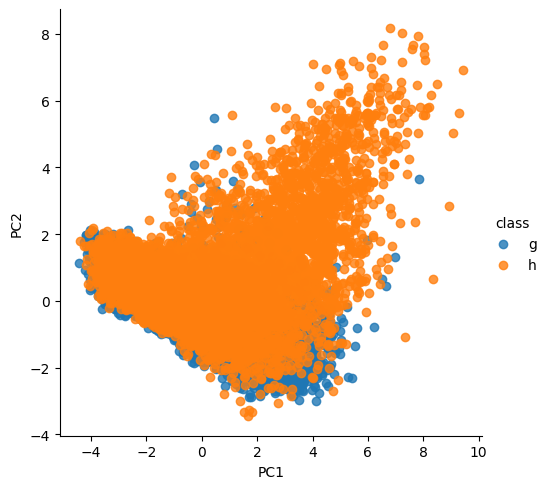

In [ ]:
# Import CategoricalDtype from pandas
from pandas.api.types import CategoricalDtype

# Create a DataFrame with PC1 and PC2, and the class labels
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

# Plot the principal components as a scatterplot
sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

# Use the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes

In [ ]:
# Get principal components with 2 features 
# Perform PCA using 2 components
pca_1 = PCA(n_components=2) 
 
# Use the principal components as X and split the data into 33% testing and the rest training
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5, max_iter=10000, dual='auto')
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {round(score_1, 3)}')

Score for model with 2 PCA features: 0.742


In [ ]:
# Using the original features 
# Select two features from the original data
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]
 
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0, max_iter=10000, dual='auto')
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 original features: {round(score_2, 3)}')

Score for model with 2 original features: 0.719


**Summary:** <br>
By using the two newly transformed PCA features as input to a support vector classifier, we are able to bump up the accuracy of our model by about 2% (.72 to .74) in comparison to using a model that includes 2 original features. Despite using the same number of input features, the results indicate that the PCA features contain more information, ultimately enhancing the performance of the model.